<a href="https://colab.research.google.com/github/abhinav0223/Parameter-Optimization/blob/main/Parameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset from UCI link or CSV (you may need to download manually)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
columns = ['letter','x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar',
           'xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']

df = pd.read_csv(url, header=None, names=columns)

# Encode target labels (letters)
le = LabelEncoder()
df['letter'] = le.fit_transform(df['letter'])

# Split into features and labels
X = df.drop('letter', axis=1).values
y = df['letter'].values

# Train-test split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [ ]:
import numpy as np

samples = []
n_samples = 10
sample_size = int(0.7 * len(X_train))  # 70% of training set

for i in range(n_samples):
    indices = np.random.choice(len(X_train), sample_size, replace=False)
    samples.append((X_train[indices], y_train[indices]))


In [ ]:
import numpy as np
import random
import time
from tqdm import tqdm
from sklearn.svm import NuSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed
import pandas as pd

# -------------------- Load Data --------------------
# Dataset URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
columns = ['letter','x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar',
           'xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']

df = pd.read_csv(url, header=None, names=columns)

# Encode labels
le = LabelEncoder()
df['letter'] = le.fit_transform(df['letter'])

# Split features and labels
X = df.drop('letter', axis=1).values
y = df['letter'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# -------------------- Create 10 Samples --------------------
samples = []
sample_size = int(0.7 * len(X_train))

for _ in range(10):
    idx = np.random.choice(len(X_train), sample_size, replace=False)
    samples.append((X_train[idx], y_train[idx]))

# -------------------- Optimization Function --------------------
def optimize_sample(i, X_s, y_s):
    best_acc = 0
    best_params = {}
    acc_history = []

    for _ in range(100):
        kernel = random.choice(['rbf', 'poly', 'sigmoid'])
        nu = random.uniform(0.1, 0.9)
        gamma = random.choice(['scale', 'auto'])

        try:
            model = NuSVC(kernel=kernel, nu=nu, gamma=gamma)
            model.fit(X_s, y_s)
            acc = model.score(X_test, y_test)

            acc_history.append(acc)

            if acc > best_acc:
                best_acc = acc
                best_params = {'kernel': kernel, 'nu': nu, 'gamma': gamma}
        except:
            continue

    return {
        'sample': f"S{i+1}",
        'accuracy': best_acc,
        'params': best_params,
        'history': acc_history
    }

# -------------------- Run in Parallel --------------------
start_time = time.time()
results = []

print("🚀 Starting 10 parallel sample optimizations (100 iterations each)...")

with ThreadPoolExecutor(max_workers=10) as executor:  # max_workers = number of samples
    futures = [executor.submit(optimize_sample, i, X_s, y_s) for i, (X_s, y_s) in enumerate(samples)]
    for future in tqdm(as_completed(futures), total=10, desc="Optimizing"):
        results.append(future.result())

total_time = time.time() - start_time
print(f"\n✅ All samples optimized in {total_time:.2f} seconds (~{total_time/60:.2f} minutes)")

# -------------------- Show Summary --------------------
for res in sorted(results, key=lambda x: x['sample']):
    print(f"{res['sample']}: Accuracy = {res['accuracy']:.4f}, Params = {res['params']}")


🚀 Starting 10 parallel sample optimizations (100 iterations each)...


Optimizing: 100%|██████████| 10/10 [28:50<00:00, 173.04s/it]


✅ All samples optimized in 1730.48 seconds (~28.84 minutes)
S1: Accuracy = 0.9715, Params = {'kernel': 'rbf', 'nu': 0.10349743084234593, 'gamma': 'auto'}
S10: Accuracy = 0.9687, Params = {'kernel': 'rbf', 'nu': 0.11148285191837842, 'gamma': 'auto'}
S2: Accuracy = 0.9697, Params = {'kernel': 'rbf', 'nu': 0.10516755108488943, 'gamma': 'auto'}
S3: Accuracy = 0.9683, Params = {'kernel': 'rbf', 'nu': 0.11299807382336038, 'gamma': 'auto'}
S4: Accuracy = 0.9683, Params = {'kernel': 'rbf', 'nu': 0.13468215746254134, 'gamma': 'auto'}
S5: Accuracy = 0.9702, Params = {'kernel': 'rbf', 'nu': 0.11678602638989243, 'gamma': 'auto'}
S6: Accuracy = 0.9695, Params = {'kernel': 'rbf', 'nu': 0.1290040428583068, 'gamma': 'auto'}
S7: Accuracy = 0.9680, Params = {'kernel': 'rbf', 'nu': 0.12701669771883817, 'gamma': 'auto'}
S8: Accuracy = 0.9698, Params = {'kernel': 'rbf', 'nu': 0.1261890004408559, 'gamma': 'auto'}
S9: Accuracy = 0.9673, Params = {'kernel': 'rbf', 'nu': 0.11520379099140819, 'gamma': 'auto'}


In [ ]:
for res in results:
    print(f"{res['sample']}: Accuracy = {res['accuracy']:.4f}, Params = {res['params']}")


S1: Accuracy = 0.9715, Params = {'kernel': 'rbf', 'nu': 0.10349743084234593, 'gamma': 'auto'}
S9: Accuracy = 0.9673, Params = {'kernel': 'rbf', 'nu': 0.11520379099140819, 'gamma': 'auto'}
S5: Accuracy = 0.9702, Params = {'kernel': 'rbf', 'nu': 0.11678602638989243, 'gamma': 'auto'}
S6: Accuracy = 0.9695, Params = {'kernel': 'rbf', 'nu': 0.1290040428583068, 'gamma': 'auto'}
S3: Accuracy = 0.9683, Params = {'kernel': 'rbf', 'nu': 0.11299807382336038, 'gamma': 'auto'}
S4: Accuracy = 0.9683, Params = {'kernel': 'rbf', 'nu': 0.13468215746254134, 'gamma': 'auto'}
S2: Accuracy = 0.9697, Params = {'kernel': 'rbf', 'nu': 0.10516755108488943, 'gamma': 'auto'}
S10: Accuracy = 0.9687, Params = {'kernel': 'rbf', 'nu': 0.11148285191837842, 'gamma': 'auto'}
S8: Accuracy = 0.9698, Params = {'kernel': 'rbf', 'nu': 0.1261890004408559, 'gamma': 'auto'}
S7: Accuracy = 0.9680, Params = {'kernel': 'rbf', 'nu': 0.12701669771883817, 'gamma': 'auto'}


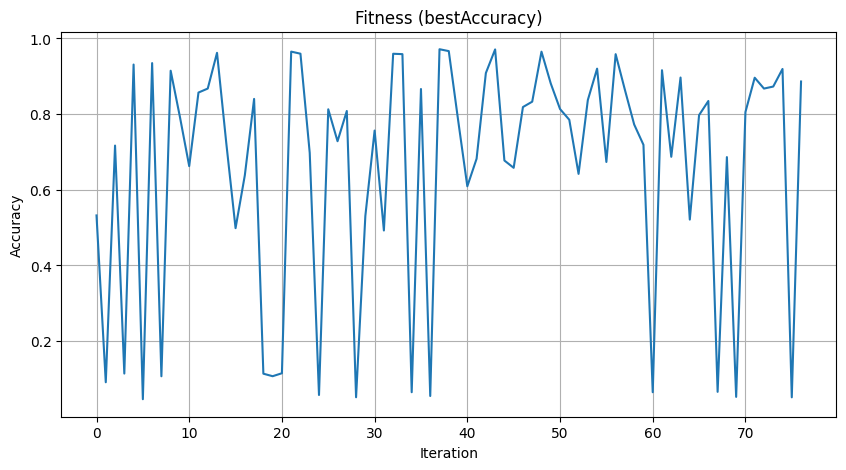

In [ ]:
import matplotlib.pyplot as plt

# Find sample with max accuracy
best_sample = max(results, key=lambda x: x['accuracy'])

plt.figure(figsize=(10, 5))
plt.plot(best_sample['history'])
plt.title("Fitness (bestAccuracy)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [ ]:
pd.DataFrame([{
    'Sample': r['sample'],
    'Best Accuracy': r['accuracy'],
    'Best Params': r['params']
} for r in results]).to_csv("svm_results.csv", index=False)
